In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from  sklearn.linear_model import Perceptron
from mlxtend.plotting import plot_decision_regions

In [11]:
!mkdir -p /content/placement
!unzip -o /content/college-placement.zip -d /content/placement

Archive:  /content/college-placement.zip
  inflating: /content/placement/placement-dataset.csv  


In [12]:
df=pd.read_csv('/content/placement/placement-dataset.csv')

In [13]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


<Axes: xlabel='cgpa', ylabel='iq'>

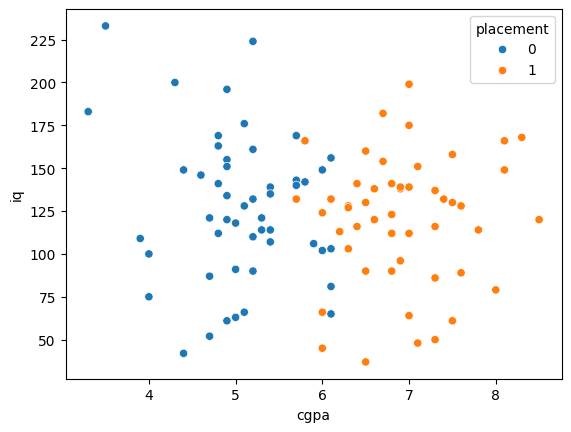

In [14]:
sns.scatterplot(x=df['cgpa'], y=df['iq'], hue=df['placement'])

In [15]:
X = df.iloc[:, 0:2]
y = df.iloc[:, -1]

In [30]:
import numpy as np

def perceptron(X, y):
    X = np.array(X)
    y = np.array(y)
    X = np.insert(X, 0, 1, axis=1)
    weight = np.ones(X.shape[1])
    lr = 0.1

    for _ in range(100000):
        for i in range(len(X)):
            j = np.random.randint(0, len(X))
            y_hat = 1 if np.dot(X[j], weight) > 0 else 0
            weight = weight + lr * (y[j] - y_hat) * X[j]

    return weight[0], weight[1:]


In [31]:
def step(z):
    return 1 if z > 0 else 0


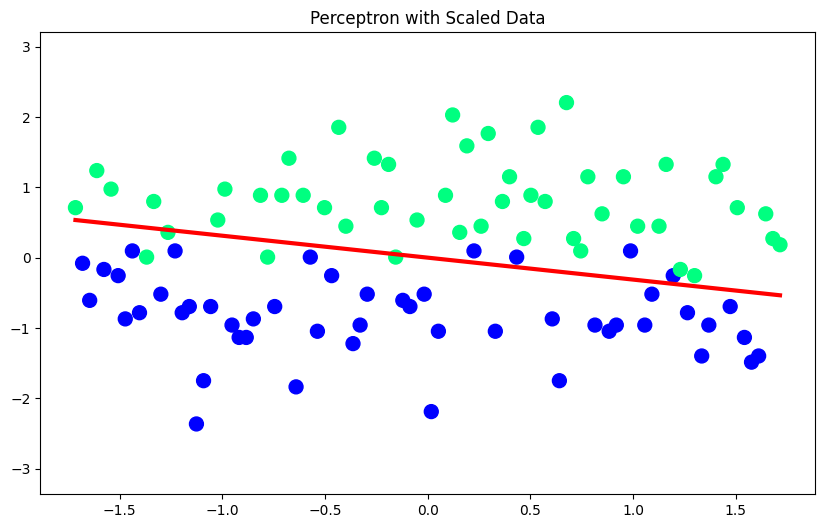

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_arr = np.array(y)


intercept_, coef_ = perceptron(X_scaled, y_arr)

# 3. CALCULATE M and B
m = -(coef_[0] / coef_[1])
b = -(intercept_ / coef_[1])

plt.figure(figsize=(10,6))
x_input = np.linspace(X_scaled[:,0].min(), X_scaled[:,0].max(), 100)
y_input = m * x_input + b
plt.plot(x_input, y_input, color='red', linewidth=3)

plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y, cmap='winter', s=100)

plt.ylim(X_scaled[:,1].min() - 1, X_scaled[:,1].max() + 1)
plt.title("Perceptron with Scaled Data")
plt.show()

In [25]:
x_input=np.linspace(-3,3,100)
y_input=m*x_input+b

In [8]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [9]:
!kaggle datasets download -d sameerprogrammer/college-placement

Dataset URL: https://www.kaggle.com/datasets/sameerprogrammer/college-placement
License(s): MIT
  0% 0.00/741 [00:00<?, ?B/s]
100% 741/741 [00:00<00:00, 2.57MB/s]
